In [37]:
# ex1

import torch
import math

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Create a PyTorch tensor with two values
x = torch.tensor([2.0, -1.0], requires_grad=True)

# Apply the sigmoid function to the tensor
y = torch.sigmoid(x)

# Compute the gradient of y with respect to x
y.sum().backward()

# Print the gradients
print(x.grad)

# Compute the gradient of the sigmoid function explicitly
grad_explicit = []
for i in range(len(x)):
    s = sigmoid(x[i])
    grad_explicit.append(s * (1 - s))
print(grad_explicit)


tensor([0.1050, 0.1966])
[0.10499358540350662, 0.19661193324148185]


In [38]:
# ex2

import torch

# Define the linear activation function
def linear(x):
    return x

# Create a PyTorch tensor with two values
x = torch.tensor([2.0, -1.0], requires_grad=True)

# Apply the linear function to the tensor
y = linear(x)

# Compute the gradient of y with respect to x
y.sum().backward()

# Print the gradients
print(x.grad)

# Compute the gradient of the linear function explicitly
grad_explicit = torch.ones_like(x)
print(grad_explicit)


tensor([1., 1.])
tensor([1., 1.])


In [39]:
# ex3

import torch

# Define the ReLU activation function
def relu(x):
    return torch.max(torch.zeros_like(x), x)

# Create a PyTorch tensor with two values
x = torch.tensor([2.0, -1.0], requires_grad=True)

# Apply the ReLU function to the tensor
y = relu(x)

# Compute the gradient of y with respect to x
y.sum().backward()

# Print the gradients
print(x.grad)

# Compute the gradient of the ReLU function explicitly
grad_explicit = torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))
print(grad_explicit)


tensor([1., 0.])
tensor([1., 0.])


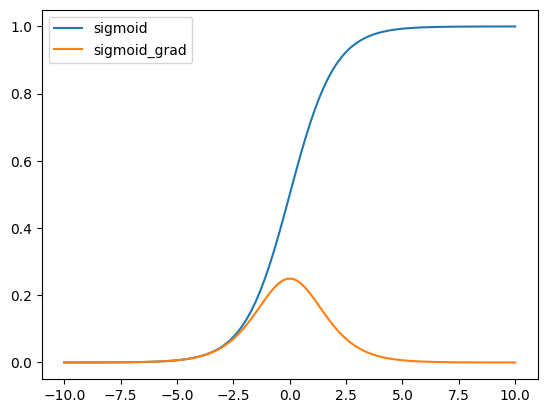

In [40]:
# ex4

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
z = sigmoid_grad(x)

plt.plot(x, y, label='sigmoid')
plt.plot(x, z, label='sigmoid_grad')
plt.legend()
plt.show()


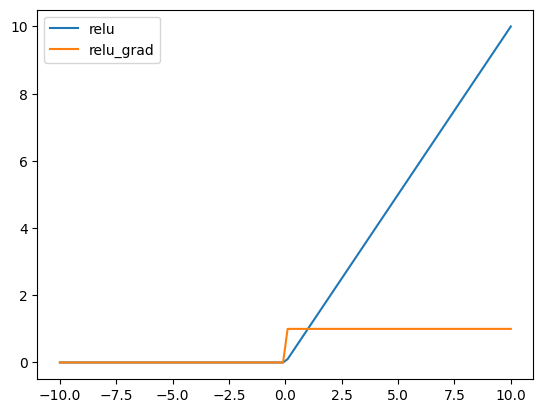

In [41]:
# ex5

import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)
y = relu(x)
z = relu_grad(x)

plt.plot(x, y, label='relu')
plt.plot(x, z, label='relu_grad')
plt.legend()
plt.show()

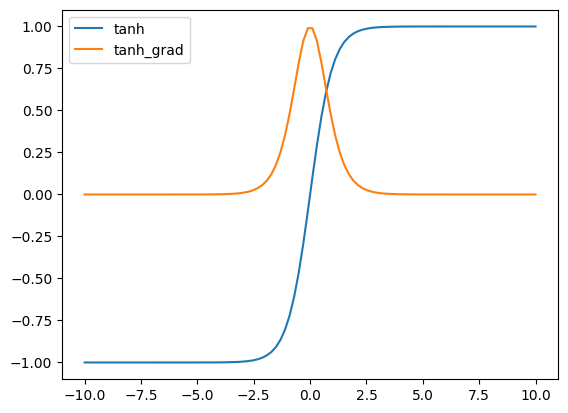

In [42]:
# ex6

import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - tanh(x) ** 2

x = np.linspace(-10, 10, 100)
y = tanh(x)
z = tanh_grad(x)

plt.plot(x, y, label='tanh')
plt.plot(x, z, label='tanh_grad')
plt.legend()
plt.show()

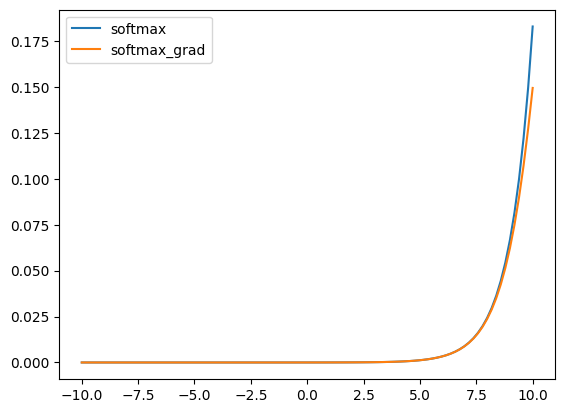

In [43]:
# ex7

import matplotlib.pyplot as plt
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def softmax_grad(x):
    return softmax(x) * (1 - softmax(x))

x = np.linspace(-10, 10, 100)
y = softmax(x)
z = softmax_grad(x)

plt.plot(x, y, label='softmax')
plt.plot(x, z, label='softmax_grad')
plt.legend()
plt.show()


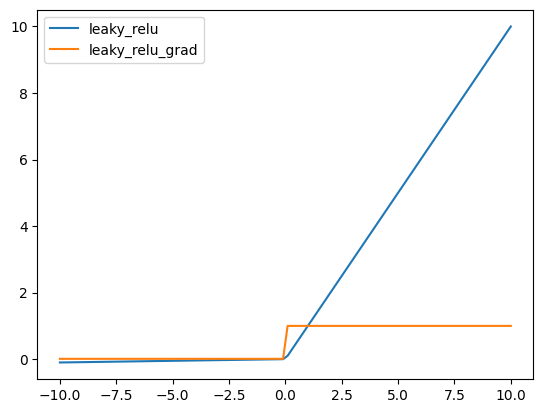

In [44]:
# ex8

import matplotlib.pyplot as plt
import numpy as np

def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

def leaky_relu_grad(x):
    return np.where(x > 0, 1, 0.01)

x = np.linspace(-10, 10, 100)
y = leaky_relu(x)
z = leaky_relu_grad(x)

plt.plot(x, y, label='leaky_relu')
plt.plot(x, z, label='leaky_relu_grad')
plt.legend()
plt.show()

In [ ]:
# ex9

import torch
import torch.nn as nn
import torch.optim as optim

# Define the input and output data
x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Define the Perceptron class
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the Perceptron class
model = Perceptron()

# Define the binary cross-entropy loss function
criterion = nn.BCEWithLogitsLoss()

# Define the stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model on the training set
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the trained model on the training set
with torch.no_grad():
    outputs = model(x_train)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f'Training Accuracy: {accuracy.item():.4f}')


: 